In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
columns = ['no','player','team','avg','game','pa','ab','r','h','2b','3b','hr','tb','rbi','sb','cs','sac','sf','bb','ibb','db','so','gidp','slg','obp']
batstats = pd.DataFrame(columns=columns)

for y in range(10):
    for l in ['c','p']:
        year = 2014+y
        url='https://npb.jp/bis/{}/stats/bat_{}.html'.format(year,l)
        dfs = pd.read_html(url)
        df = dfs[0]
        df.drop(df.index[[0, 1]],inplace=True)
        df.columns=columns
        batstats = pd.concat([batstats, df], axis=0)

In [3]:
batstats = batstats.astype({'hr': 'int', 'rbi': 'int'}) 

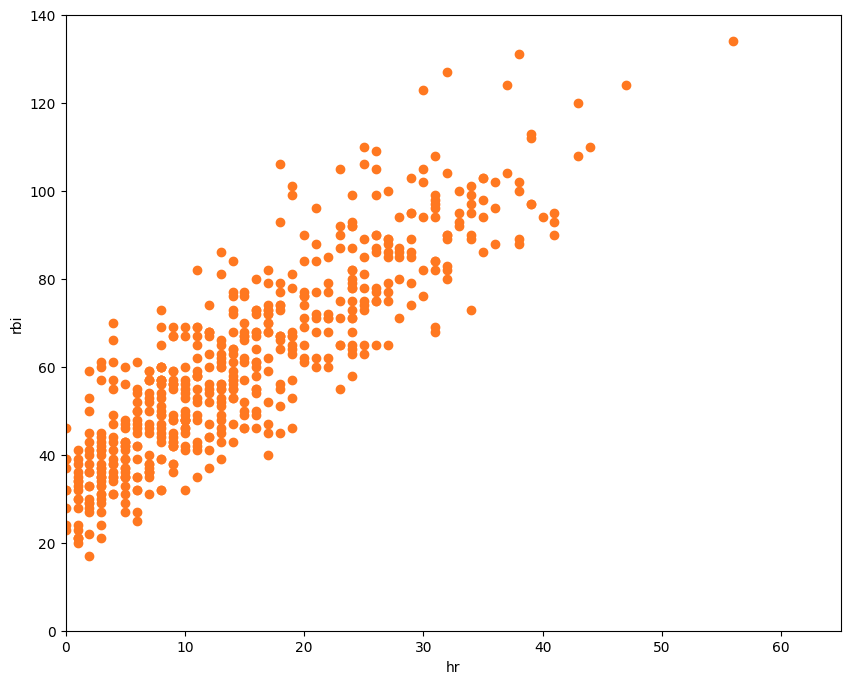

In [12]:
# プロット
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, xlabel='hr', ylabel='rbi', xlim=(0,65), ylim=(0,140))

ax.scatter(batstats['hr'], batstats['rbi'], c='#FF7820')
fig.savefig('scatter.png')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ホームランと打点のデータを抽出
hr = batstats['hr']
rbi = batstats['rbi']

# 線形回帰モデルの訓練
reg = LinearRegression()
reg.fit(hr.values.reshape(-1, 1), rbi)

LinearRegression()

In [8]:
# 線形回帰の結果（パラメータ）を出力
slope = reg.coef_[0]
intercept = reg.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  1.8587877579533112
Intercept:  33.49804007211504


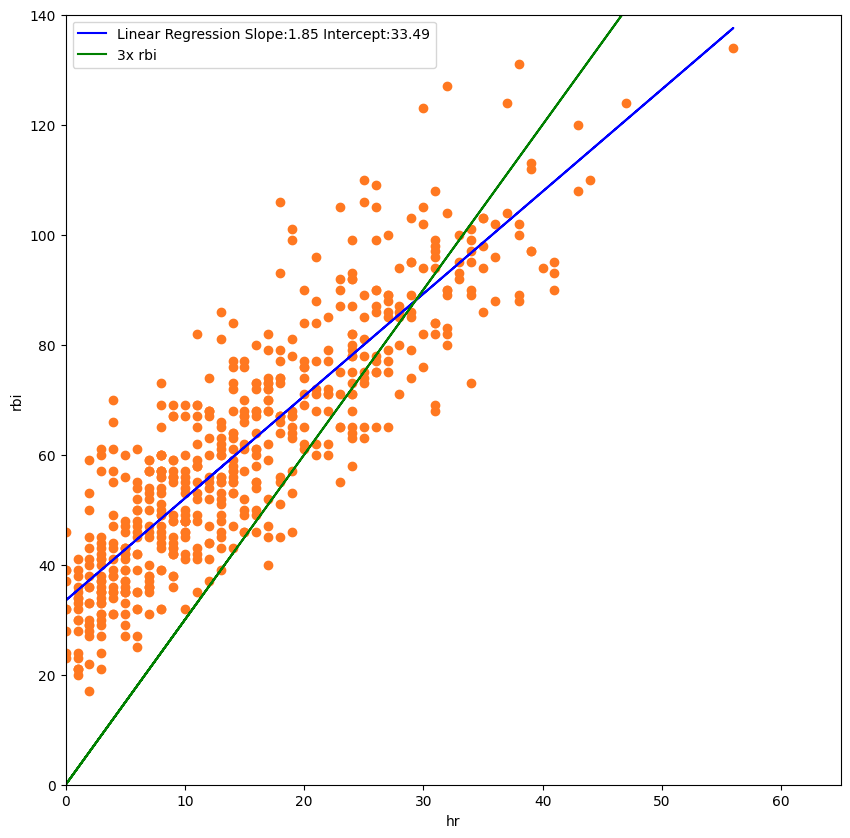

In [15]:
# プロット
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, xlabel='hr', ylabel='rbi', xlim=(0,65), ylim=(0,140))

ax.scatter(batstats['hr'], batstats['rbi'], c='#FF7820')
ax.plot(hr, reg.predict(hr.values.reshape(-1, 1)), color='b', label='Linear Regression Slope:1.85 Intercept:33.49')
ax.plot(hr, hr*3, color='g', label='3x rbi')

ax.legend()

fig.savefig('linefit.png')

In [45]:
batstats['hr_rbi_ratio'] =  batstats['rbi']/batstats['hr']

In [11]:
batstats.to_csv('batstats.csv')